# Introduction to graphics for python via `plotnine`

**Plotnine package facilitates the creation of highly-informative plots of structured data based on the R implementation of `ggplot2`. The plotnine package is built on the top of Matplotlib and interacts well with Pandas**


## #1:Installation

**We need to install the package from our command before we start to use it**

## #2:Import

Now we can call `plotnine` in our python code

In [2]:
import plotnine as p9
from plotnine import *
from plotnine.data import *

## #3:Some fundimental plots via plotnine

**Actually there are plenty plots that Plotnine can make, but because of the time limitation we will introduce only these four**

- Bar Chart
- Scatter Plot
- Histogram
- Box Plot

**Examples will be illustrated with the new york crash dataset, and since the dataset is too large, I will extract the first 50 crashes to do the illustration:** 

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('nyc_crashes_202301.csv')
df1 = df.head(50)
df1.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,01/02/2023,18:00,NaN,NaN,40.654440,-73.890810,"(40.65444, -73.89081)",WORTMAN AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4594894,Sedan,NaN,NaN,NaN,NaN
1,01/02/2023,23:51,NaN,NaN,NaN,NaN,NaN,BELT PARKWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4594907,Sedan,NaN,NaN,NaN,NaN
2,01/02/2023,13:00,QUEENS,11368.0,40.741104,-73.853820,"(40.741104, -73.85382)",VANCLEEF STREET,108 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4594926,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,01/02/2023,6:17,NaN,NaN,40.602543,-74.133250,"(40.602543, -74.13325)",NaN,NaN,451 BUCHANAN AVENUE,...,NaN,NaN,NaN,NaN,4595120,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
4,01/02/2023,1:50,NaN,NaN,40.756897,-73.893196,"(40.756897, -73.893196)",32 AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4594577,Sedan,Sedan,NaN,NaN,NaN


#### Bar Chart

**Suppose we are curious about the types of vehicle in the crash, we can make a bar chart like this:**

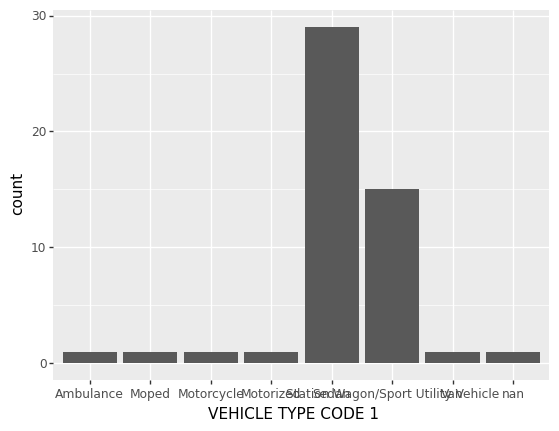

<ggplot: (112309356638)>

In [4]:
(    
    ggplot(df1)  #The data we are using
    + geom_bar(aes(x = 'VEHICLE TYPE CODE 1') ) #the plot we want to make
)

**Some improvement of the chart:**

1. Black is too dreary! We want to make this graph more vivid and fancy(maybe by adding color)

2. In here the labels in x axis are really hard to see, so we might make some arrangement for the angle of the lables

3. And also, we want to have a title for the graph, and maybe change the label for axis

4. Sometimes we may want the spesific counts for the bars -- by adding a label

5. Suppose we want to fliped the data to verticle -- we can do that too

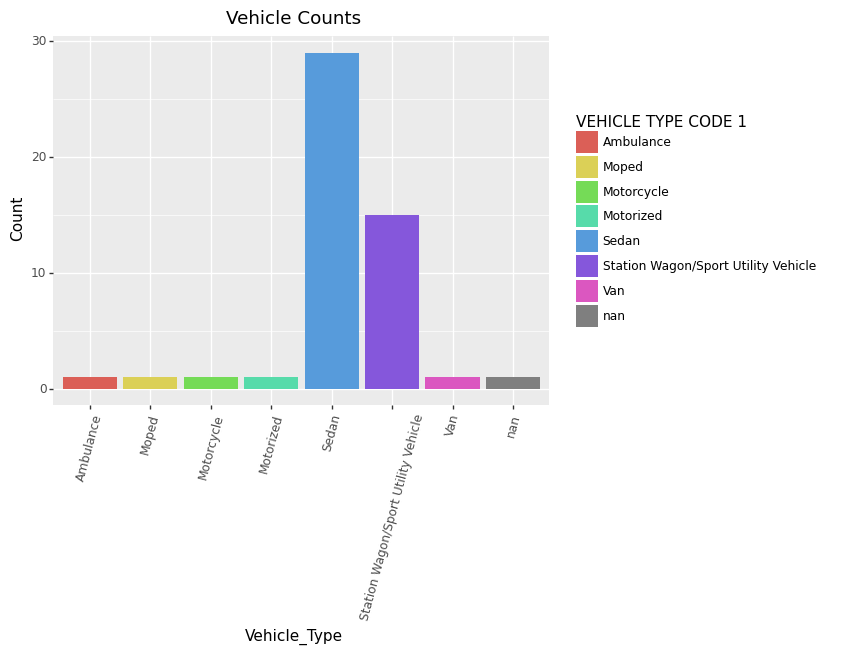

<ggplot: (112310025831)>

In [5]:
(
    ggplot(df1, #The dataset we are using
           aes(x = 'VEHICLE TYPE CODE 1', fill='VEHICLE TYPE CODE 1'))  #x is the specific column in the dataset we are using, 'fill' color the columns of Vehicle Type Code 1"
    + geom_bar() #The plot we want to make
    + theme(axis_text_x=element_text(angle=75)) #We want the text to have an angle
    + ggtitle('Vehicle Counts') #Make a title for the chart
    + xlab("Vehicle_Type") #Change x lable of the graph
    + ylab("Count") #Change y lable of the graph
   #+ coord_flip() #Flipped the data to verticle
)

#### Scatter Plot

**Suppose we are curious about the place where Crashes happend, we may do a scatter plot for the longitude and latitude**

C:\Users\12069\anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


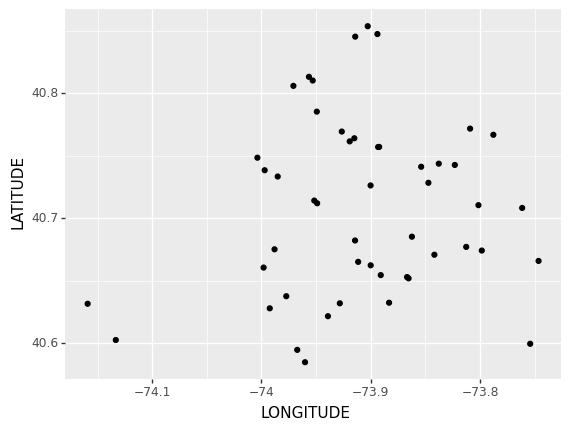

<ggplot: (112309958253)>

In [6]:
(
    ggplot(df1, #The dataset we are using
       aes(x = 'LONGITUDE', y='LATITUDE')) # Make x and y axis
        + geom_point() # Fill the points inside the graph
       #+ geom_smooth(method = 'lm') # It is senseless to do this in here but this is the way we fit a line for scatter plots
)

**Some Improvements:**
1. Sometimes we might want to change the shape of the dot to something else

2. We might find the points are uniform, we may want to change the size of the points too

C:\Users\12069\anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 2 rows containing missing values.
C:\Users\12069\anaconda3\lib\site-packages\plotnine\guides\guides.py:253: PlotnineWarning: geom_point legend : Removed 1 rows containing missing values.


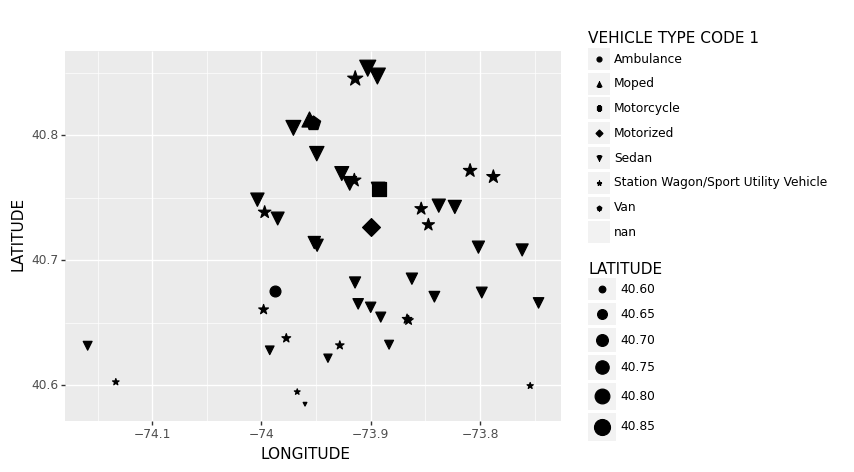

<ggplot: (112309992542)>

In [7]:
(
    ggplot(df1, #The dataset we are using
        aes(x = 'LONGITUDE', y='LATITUDE', size = 'LATITUDE')) # Make x and y axis, and make point size by latitude
        + geom_point( # Fill the point inside the graph
         aes(shape='VEHICLE TYPE CODE 1')) # change the shape of the dots according to Vehicle Type
)

**The Dataset might be too small to see the clustering, we might need to have a bigger one-- with some clean up**

**And also, we can anticipate that a lump of black dots are not beautiful! We might want to change its color**

C:\Users\12069\anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 533 rows containing missing values.


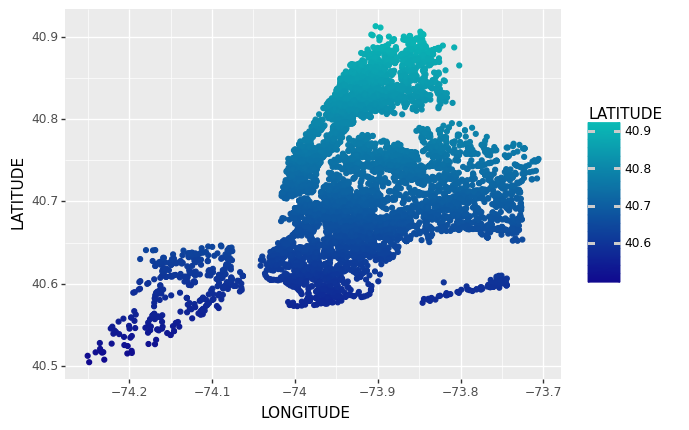

<ggplot: (112310027174)>

In [8]:
df2 = df.head(10000) # A little bit data cleaning process
df2["LATITUDE"] = df2["LATITUDE"].replace([0.0], np.nan)
df2["LONGITUDE"] = df2["LONGITUDE"].replace([0.0], np.nan)

(
    ggplot(df2, #The dataset we are using
        aes(x = 'LONGITUDE', y='LATITUDE', color = 'LATITUDE')) #We have our x as Longitude, y as latitude, and we colored the clusters by its latitude
        + geom_point()
        + scale_color_gradient(low='#10098f', high='#0ABAB5',guide='colorbar') #From low lattitude to high lattitude colors -- according to colorbar(p.s. Ultramarine and Tiffany blue, my favorites colors)         
)

#### Histogram

**I can not find a continuous variable in the NYC Car Crach dataset, so it might be better to import other dataset to do that**

**In here I will use a dataset plant in Python called diamonds**

In [9]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Suppose we are curious about the carats of these diamonds, we can make a histogram for that**

C:\Users\12069\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 142'. Pick better value with 'binwidth'.


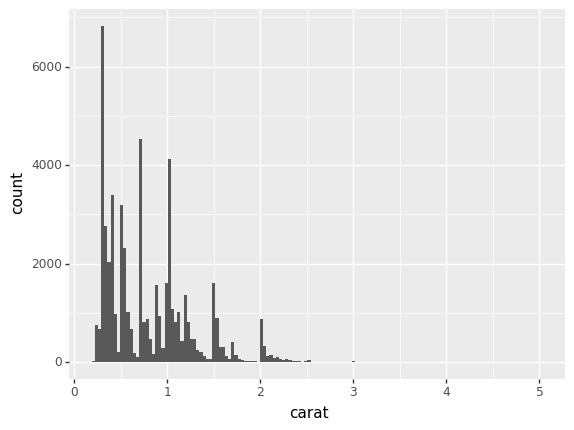

<ggplot: (112310331371)>

In [10]:
(
    ggplot(diamonds, #the dataset we are using
           aes(x='carat')) #the axis we are doing
    + geom_histogram() #We want to do a histogram
)

**Some Improvements:**

1. We can make the graph look nicer by defining the number of bins and bins' width, this graph waste too much places

2. When we dealing with this data, we might find out that the count is way too large, so we might want to do some normalization to a number that closer to the number of carat(1 maybe)

3. Sometimes we might want to see the proportion of the graph, we can handle that by some improvements

4. We can also filled the color of the gram with some other variables to see other characristics of these variables, for example, we might curious about the quality of cut of each diamonds

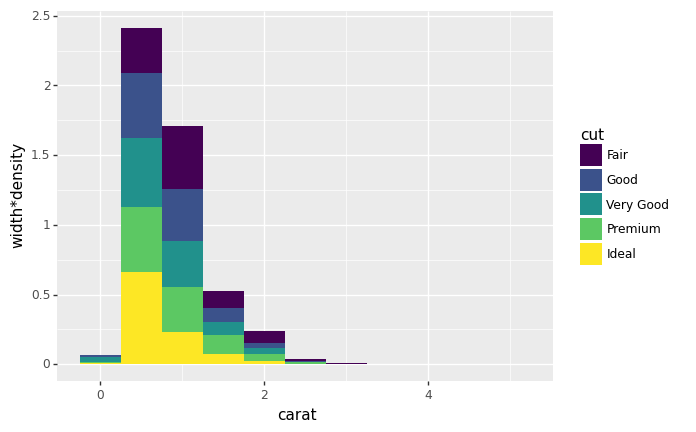

<ggplot: (112310281123)>

In [11]:
(
    ggplot(diamonds, aes(x = 'carat',
                    #  y = after_stat('count'), # specify each bin is a count
                   #  y = after_stat('ncount'), #normalise the count to 1
                    # y = after_stat('density'), # density
                     y = after_stat('width*density'), # Do some little calculation
                      fill = 'cut'))  #filled color by variable'cut')) 
    + geom_histogram(binwidth= 0.5) #change the width of the bin
)


**We can even make the plot more fancy by its own theme!**

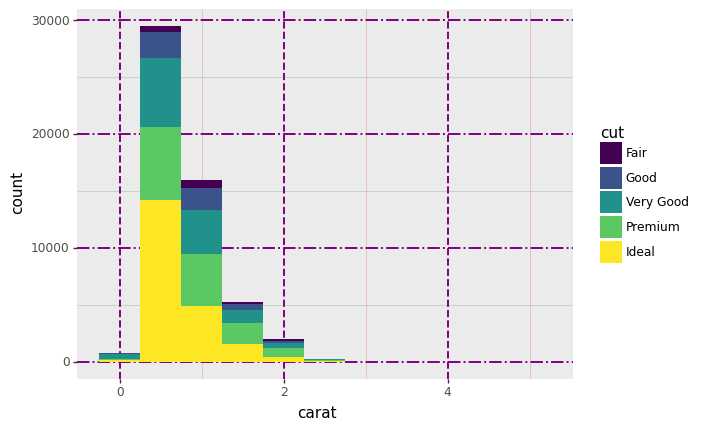

<ggplot: (112310537129)>

In [12]:
(
    ggplot(diamonds, aes(x = 'carat',
                      y = after_stat('count'), # specify each bin is a count
                   #  y = after_stat('ncount'), #normalise the count to 1
                   #  y = after_stat('density'), # density
                   #  y = after_stat('width*density')), # show proportion 
                      fill = 'cut'))  #filled color by variable'cut')) 
    + geom_histogram(binwidth= 0.50) #change the width of the bin
   #+ theme_xkcd()  
   #+ theme(rect=element_rect(color='black', size=3, fill='#EEBB0050'))
    + theme(
    panel_grid=element_line(color='purple'),
    panel_grid_major=element_line(size=1.4, alpha=1),
    panel_grid_major_x=element_line(linetype='dashed'),
    panel_grid_major_y=element_line(linetype='dashdot'),
    panel_grid_minor=element_line(alpha=.25),
    panel_grid_minor_x=element_line(color='red'),
    panel_grid_minor_y=element_line(color='green'),
    panel_ontop=False  # puts the points behind the grid
 )
)

#### Boxplot

**Back to the NYC Crash Data, suppose we want to analysis the relationship among numbers of persons injured and borough, we might build a boxplot to see that**

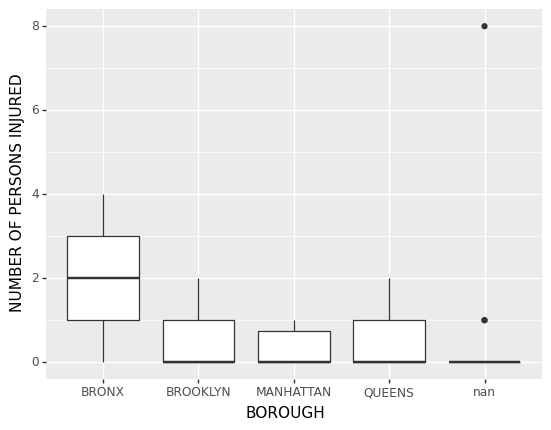

<ggplot: (112310544400)>

In [13]:
(
    ggplot(df1, #The data we use
             aes("BOROUGH" , "NUMBER OF PERSONS INJURED")) 
    + geom_boxplot() #The plot we use
)

**Some Improvements:**

1. Add a title to the plot, change the title of x and y axis

2. We may want to change the color of the boxes..? Sometimes?

3. We can change the theme of the plot

4. Sometimes we may want to see all the points of the boxplot, we can do that with plotnine

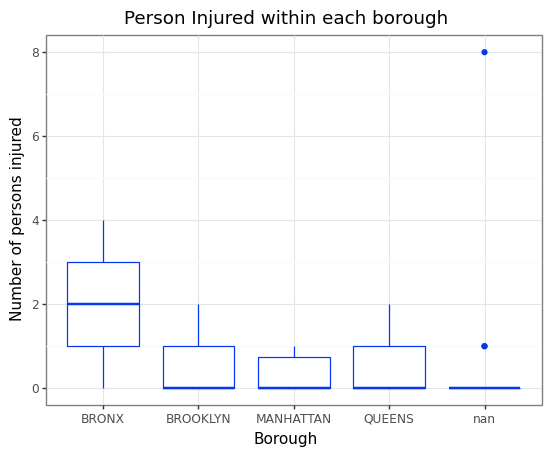

<ggplot: (112310499985)>

In [14]:
(
    ggplot(df1, #The data we use
             aes("BOROUGH" , "NUMBER OF PERSONS INJURED")) 
    + geom_boxplot(color = "#0437F2") #The plot we use, and change the color in here
    + xlab("Borough") #Change the title of x axis
    + ylab("Number of persons injured") #Change the title of y axis
    + ggtitle("Person Injured within each borough") #Add a title for the graph
    + theme_bw() #Maybe we can add a theme sometimes?
   #+ geom_jitter() #This function can add all the points of the boxplot
)

## #4: Sub Graphs

**As any other library supporting the Grammar of Graphics, `plotnine` has a special technique called facet that allows to split one plot into multiple plots based on a factor variable included in the dataset.**

**The examples will be illustrated via diamonds dataset**

In [15]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**For the sub graphs plotnine we are going to talk about two important grammar-- facet_wrap and facet_grid**

### `facet_wrap`

**Sometimes we might want to see a lot of charts inside one large one, we can also do this within plotnine Facet_wrap**

**For example, in the diamond dataset, Suppose we are curious about the carat vs. price graphs for each levels of cut, we can do a plot like that**

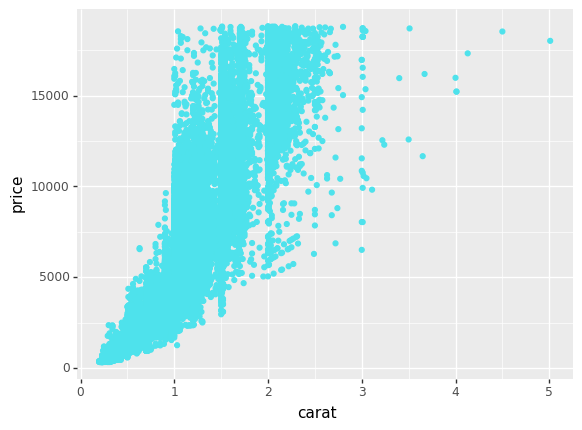

<ggplot: (112310285322)>

In [16]:
(
    ggplot(diamonds, aes(x = 'carat', y = 'price'))
    + geom_point(color = '#4EE2EC') # Diamond blue!
    + labs(x='carat', y='price')
    #+ facet_wrap('cut', # Distinguish the levels of cut within the plot of carat vs. price
                 #ncol = 2) # Change the number of columns
)

### `Facet_grid`

**Sometimes we may want to see the facets with more than one variables, we can use `Facet_grid`**

**In this case, suppose we are curious about the graphs of carat vs. price for each levels of cut and clarity**

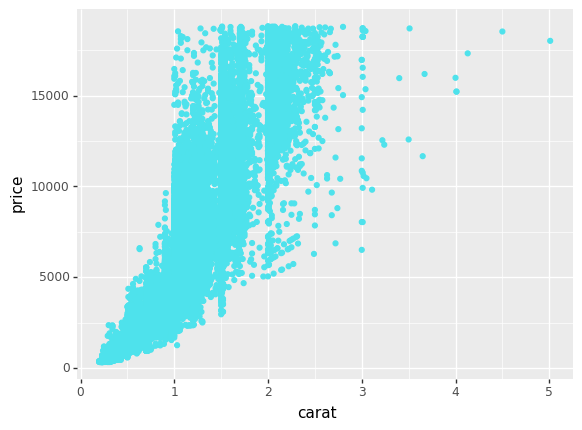

<ggplot: (112310022434)>

In [20]:
(
    ggplot(diamonds, aes(x='carat', y='price', 
                         color = 'depth' # If we want to see another dimension of data, we might use color to illustrate that
                        ))
    + geom_point(color = '#4EE2EC') 
    + labs(x='carat', y='price')
    #+ facet_grid('cut ~ clarity') # Cut levels at right and clarities at top
    #+ facet_grid('cut ~ .') # Cut levels only, at top
    #+ facet_grid('. ~ clarity') # Clarities only, at right
    #+ scale_color_gradient(low='#10098f', high='#0ABAB5',guide='colorbar') #The color will represent depth, from low to high by light to dense of the color
)

**We can also seperate this two-dimensional plot to one dimensional by list all the posible combinations of these characters on the side**

**In this case we can use facet_grid to generate those plots**

**And also, we might be interested in the trend of these variables, so we may estiamte a linear regression for them**

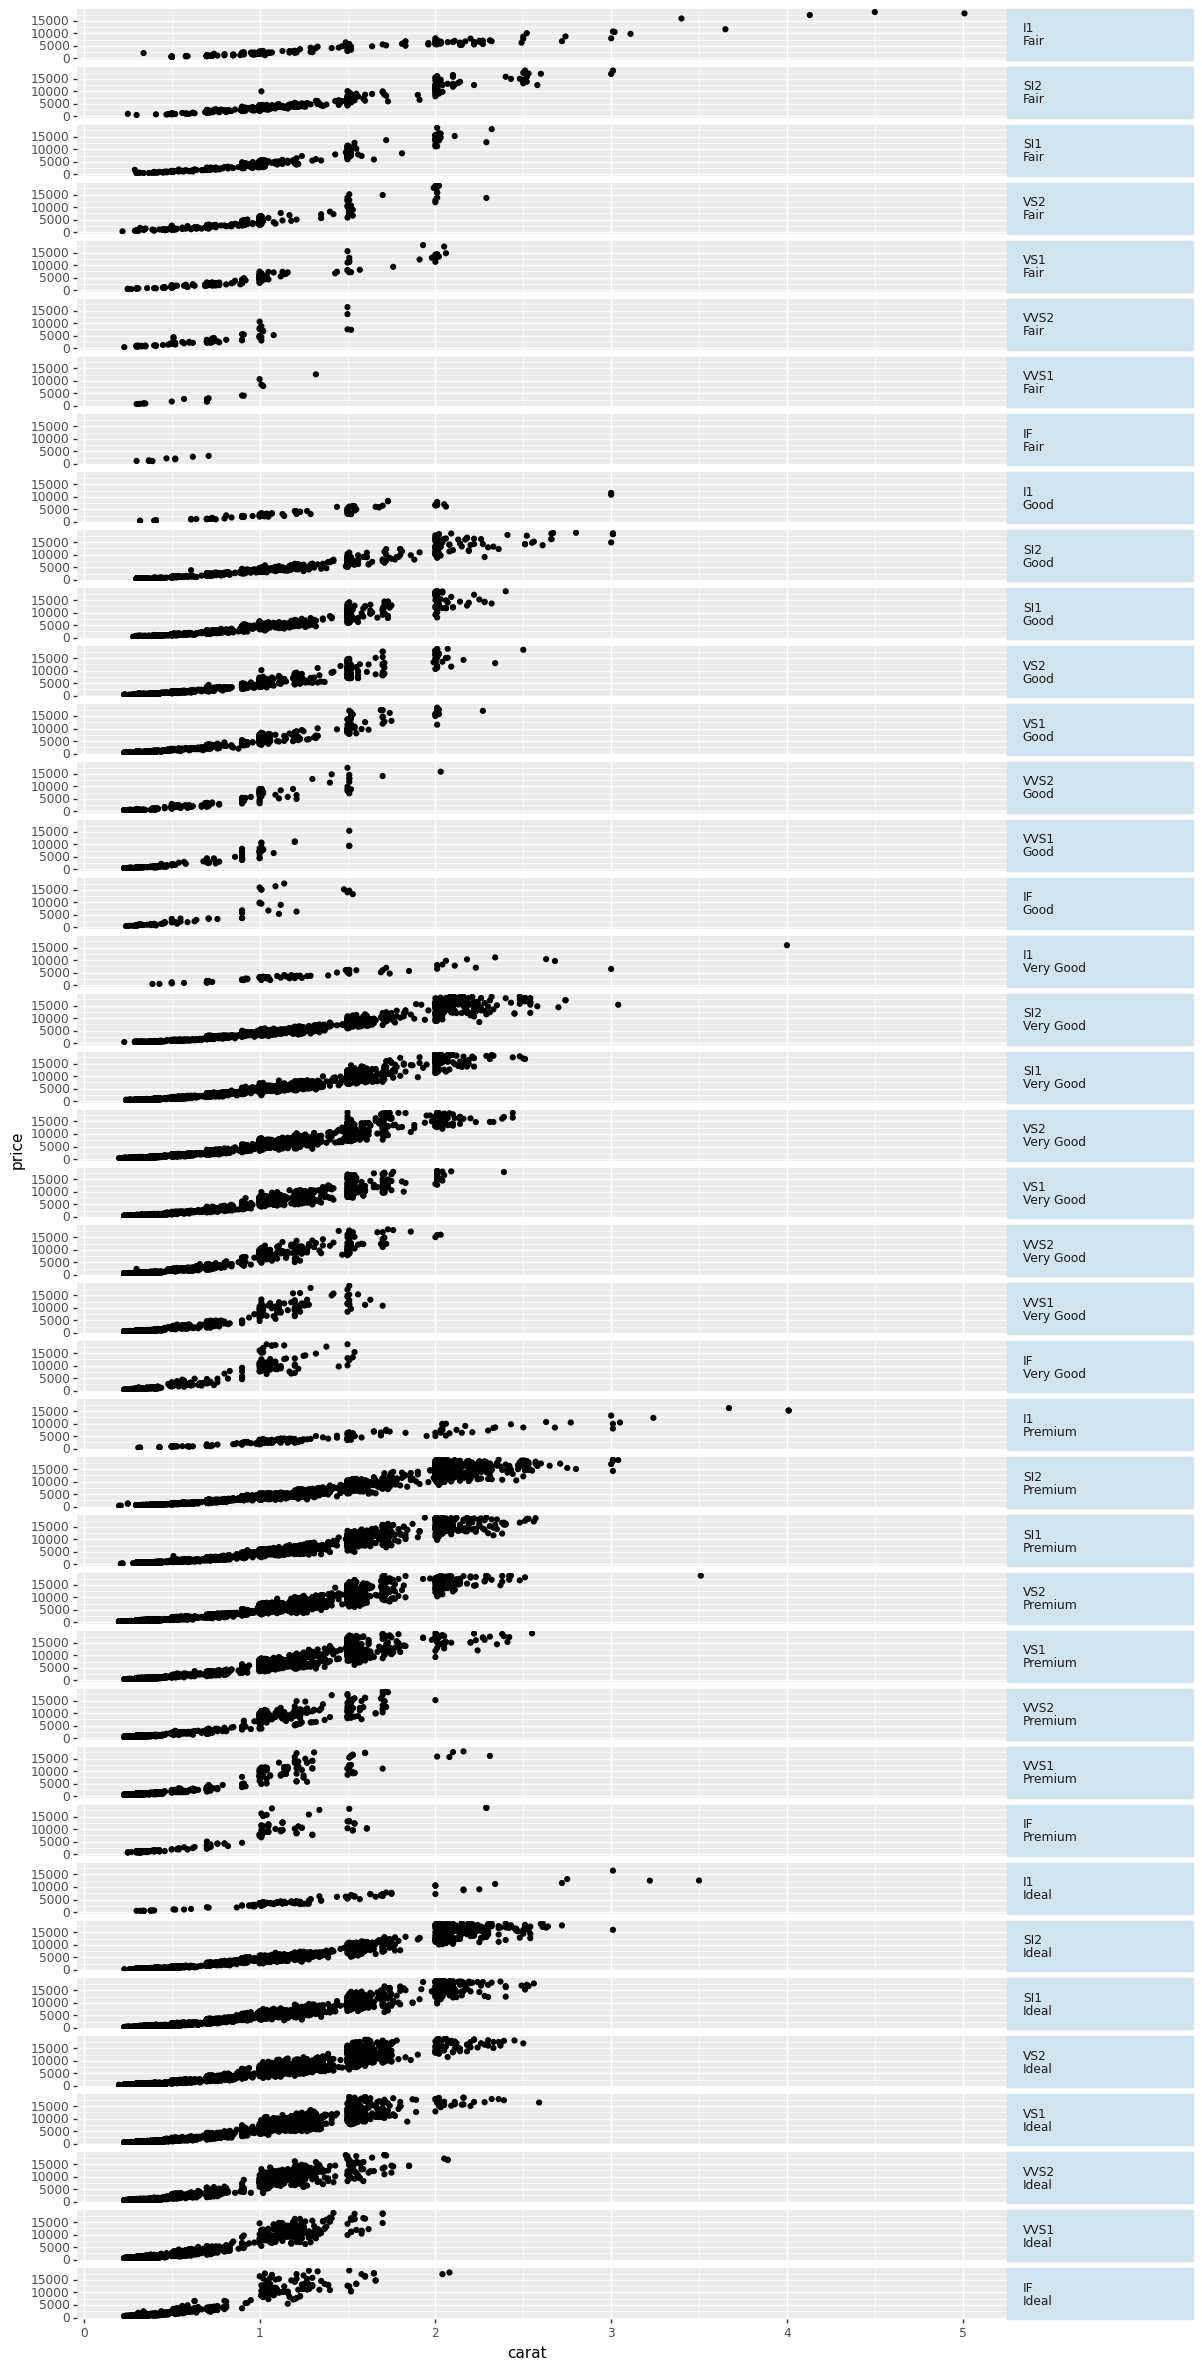

<ggplot: (112314335537)>

In [18]:
(
    ggplot(diamonds, aes(x='carat', y='price')) # The plot we want to make
    + geom_point()
   #+ geom_smooth() # Estimate Linear Regression
    + facet_grid('cut+clarity ~ .') # We want to see the carat vs. price data seperated by cut+clarity
    + theme(strip_text_y = element_text(angle = 0,              # change facet text angle
                                        ha = 'left'             # change text alignment
                                       ),
            strip_background_y = element_text(color = '#cfe4ee' # change background colour of facet background, in this case-- diamond blue!
                                              , width = 0.2     # adjust width of facet background to fit facet text
                                             ),
            figure_size=(12, 30)                                 # adjust width & height of figure to fit y-axis
           )
)

## #5:Some useful resources

Learn all you need to know about Plotnine via its own website:

https://plotnine.readthedocs.io/en/stable/index.html


In case you are interested in data visualization via python, check out this website!

https://pythonplot.com/

And finally there is a useful data visualization Github I found, read it if you are interested!

https://github.com/pmaji/practical-python-data-viz-guide

# Thank you very much!